# PGM plate illustrations
Created using the `daft` python package.

In [15]:
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt
rc('font', family='serif', size=12)
rc('text', usetex=True)
mpl.rcParams['figure.figsize'] = [10, 6]

import daft

### Generic

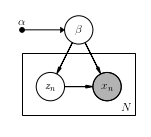

In [62]:
# Instantiate the PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3])

# Hierarchical parameters.
pgm.add_node(daft.Node('alpha', r"$\alpha$", 0.5, 2, fixed=True))
pgm.add_node(daft.Node('beta', r"$\beta$", 1.5, 2))

# Latent variable.
pgm.add_node(daft.Node('z', r"$z_n$", 1, 1))

# Data.
pgm.add_node(daft.Node('x', r"$x_n$", 2, 1, observed=True))

# Add in the edges.
pgm.add_edge("alpha", "beta", linewidth=0.5, head_width=0.2, head_length=0.15)
pgm.add_edge("beta", "z")
pgm.add_edge('z', 'x')
pgm.add_edge('beta', 'x')

# Add a plate.
pgm.add_plate(daft.Plate([0.5, 0.6, 2, 1],position='bottom right', label='$N$', 
                         bbox={'linewidth':0, 'fill':False},
    shift=-0.1))


# Render and save
pgm.render()
pgm.figure.savefig('classic.png', dpi=150)

### LDA

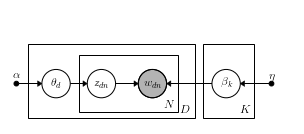

In [120]:
pgm = daft.PGM([5, 2], origin=[0.2, 0.3])

pgm.add_node(daft.Node('alpha', r"$\alpha$", 0.3, 1, fixed=True))
pgm.add_node(daft.Node('eta', r"$\eta$", 4.8, 1, fixed=True))

pgm.add_node(daft.Node('theta', r"$\theta_d$", 1, 1))
pgm.add_node(daft.Node('z_dn', r"$z_{dn}$", 1.8, 1))
pgm.add_node(daft.Node('w_dn', r"$w_{dn}$", 2.7, 1, observed=True))

pgm.add_node(daft.Node('beta', r"$\beta_k$", 4.0, 1))


pdict = {'linewidth': 0.5, 'head_width': 0.2, 'head_length':0.15}
pgm.add_edge('alpha', 'theta', **pdict)
pgm.add_edge('theta', 'z_dn', **pdict)
pgm.add_edge('z_dn', 'w_dn', **pdict)
pgm.add_edge('beta', 'w_dn', **pdict)
pgm.add_edge('eta', 'beta', **pdict)

labeldict = {'linewidth':0, 'fill':False}
pgm.add_plate(daft.Plate([0.5, 0.4, 2.95, 1.3], position='bottom right', label='$D$', bbox=labeldict))
pgm.add_plate(daft.Plate([3.6, 0.4, 0.9, 1.3], position='bottom right', label='$K$', bbox=labeldict))
pgm.add_plate(daft.Plate([1.4, 0.5, 1.75, 1], position='bottom right', label='$N$', bbox=labeldict))


pgm.render()
pgm.figure.savefig('lda.png',dpi=150)